# Audio classification

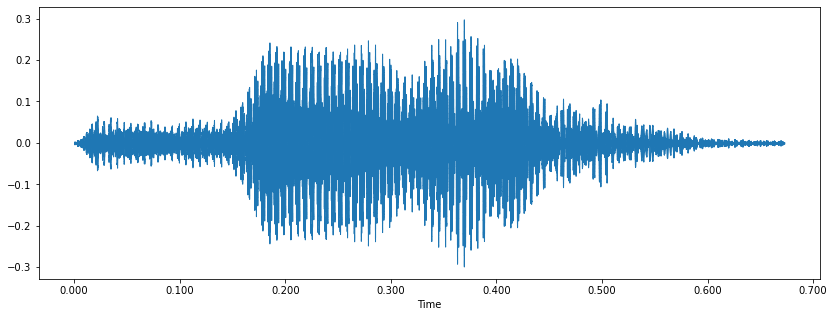

In [1]:
import librosa
import IPython.display as ipd
from librosa.display import waveshow

file = 'C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings/0_george_7.wav'

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

data, sr = librosa.load(file)

waveshow(data,sr=sr)
ipd.Audio(file)



In [2]:
from scipy.io import wavfile
w = wavfile.read(file)







# import dataset

In [3]:
import os
import pandas as pd


path ='C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings/'

file_list = []

for root, dirs, files in os.walk(path):
    file_list.append(files)

k_ = []
for i in file_list:
    for j in i:
        k_.append(j)

file_list = k_

labels = []
for i in file_list:
        labels.append(i[0])

data_frame = pd.DataFrame()

data_frame['filename'] = file_list
data_frame['labels'] = labels

data_frame

,filename,labels
0,0_george_0.wav,0
1,0_george_1.wav,0
2,0_george_10.wav,0
3,0_george_11.wav,0
4,0_george_12.wav,0
...,...,...
2995,9_yweweler_5.wav,9
2996,9_yweweler_6.wav,9
2997,9_yweweler_7.wav,9
2998,9_yweweler_8.wav,9



# process data 


In [4]:
def feature_extracter(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [5]:
extracted_features = []
from tqdm import tqdm
import numpy as np
for i in tqdm(data_frame['filename']):
    data = feature_extracter('C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings/'+str(i))
    extracted_features.append(data)
    

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [02:20<00:00, 21.41it/s]


In [6]:
import pandas as pd
extracted_features_of = pd.DataFrame(columns=['feature','class'])

extracted_features_of['feature'] = extracted_features
extracted_features_of['class'] = labels

In [7]:
X = np.array(extracted_features_of['feature'].tolist())
y = np.array(extracted_features_of['class'].tolist())

In [8]:
y = np.array(pd.get_dummies(y))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
X_test.shape

(750, 40)

# train it 


In [11]:
from tensorflow.keras.models import Sequential as sq
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics 

In [12]:
num_labels = y.shape[1]

In [13]:
model = sq()
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [15]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

#checkpointer = ModelCheckpoint(filepath=)

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100
71/71 [==============================] - ETA: 1:22 - loss: 71.4261 - accuracy: 0.218 - ETA: 0s - loss: 68.0060 - accuracy: 0.0938  - ETA: 0s - loss: 58.4386 - accuracy: 0.101 - ETA: 0s - loss: 51.4242 - accuracy: 0.102 - ETA: 0s - loss: 45.4975 - accuracy: 0.103 - ETA: 0s - loss: 39.8443 - accuracy: 0.102 - ETA: 0s - loss: 35.4887 - accuracy: 0.104 - 2s 11ms/step - loss: 33.9265 - accuracy: 0.1049 - val_loss: 2.3058 - val_accuracy: 0.1080
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 8.7854 - accuracy: 0.09 - ETA: 0s - loss: 10.2333 - accuracy: 0.119 - ETA: 0s - loss: 9.4110 - accuracy: 0.114 - ETA: 0s - loss: 8.7854 - accuracy: 0.10 - ETA: 0s - loss: 8.1138 - accuracy: 0.10 - ETA: 0s - loss: 7.5764 - accuracy: 0.10 - ETA: 0s - loss: 7.1101 - accuracy: 0.11 - 0s 6ms/step - loss: 7.0027 - accuracy: 0.1107 - val_loss: 2.3037 - val_accuracy: 0.0813
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 5.2732 - accuracy: 0.09 - ETA: 0s - lo

71/71 [==============================] - ETA: 0s - loss: 2.3440 - accuracy: 0.12 - ETA: 0s - loss: 2.3310 - accuracy: 0.11 - ETA: 0s - loss: 2.3171 - accuracy: 0.11 - ETA: 0s - loss: 2.3161 - accuracy: 0.11 - ETA: 0s - loss: 2.3150 - accuracy: 0.11 - ETA: 0s - loss: 2.3193 - accuracy: 0.11 - ETA: 0s - loss: 2.3174 - accuracy: 0.11 - 0s 6ms/step - loss: 2.3182 - accuracy: 0.1089 - val_loss: 2.3099 - val_accuracy: 0.0813
Epoch 20/100
71/71 [==============================] - ETA: 0s - loss: 2.2807 - accuracy: 0.15 - ETA: 0s - loss: 2.3124 - accuracy: 0.10 - ETA: 0s - loss: 2.3085 - accuracy: 0.11 - ETA: 0s - loss: 2.3125 - accuracy: 0.11 - ETA: 0s - loss: 2.3116 - accuracy: 0.11 - ETA: 0s - loss: 2.3091 - accuracy: 0.11 - ETA: 0s - loss: 2.3083 - accuracy: 0.11 - ETA: 0s - loss: 2.3096 - accuracy: 0.11 - ETA: 0s - loss: 2.3085 - accuracy: 0.10 - 1s 8ms/step - loss: 2.3085 - accuracy: 0.1076 - val_loss: 2.3104 - val_accuracy: 0.0813
Epoch 21/100
71/71 [==============================] - ETA

71/71 [==============================] - ETA: 0s - loss: 2.3040 - accuracy: 0.12 - ETA: 0s - loss: 2.3281 - accuracy: 0.09 - ETA: 0s - loss: 2.3148 - accuracy: 0.10 - ETA: 0s - loss: 2.3191 - accuracy: 0.09 - ETA: 0s - loss: 2.3125 - accuracy: 0.10 - ETA: 0s - loss: 2.3110 - accuracy: 0.10 - ETA: 0s - loss: 2.3105 - accuracy: 0.09 - 0s 6ms/step - loss: 2.3096 - accuracy: 0.0964 - val_loss: 2.3111 - val_accuracy: 0.0813
Epoch 38/100
71/71 [==============================] - ETA: 0s - loss: 2.2946 - accuracy: 0.15 - ETA: 0s - loss: 2.3010 - accuracy: 0.10 - ETA: 0s - loss: 2.3030 - accuracy: 0.09 - ETA: 0s - loss: 2.3071 - accuracy: 0.10 - ETA: 0s - loss: 2.3094 - accuracy: 0.10 - ETA: 0s - loss: 2.3082 - accuracy: 0.10 - ETA: 0s - loss: 2.3091 - accuracy: 0.10 - 0s 6ms/step - loss: 2.3083 - accuracy: 0.1022 - val_loss: 2.3110 - val_accuracy: 0.0840
Epoch 39/100
71/71 [==============================] - ETA: 1s - loss: 2.2862 - accuracy: 0.15 - ETA: 0s - loss: 2.2983 - accuracy: 0.11 - ETA

71/71 [==============================] - ETA: 2s - loss: 2.3045 - accuracy: 0.09 - ETA: 0s - loss: 2.2721 - accuracy: 0.11 - ETA: 0s - loss: 2.2735 - accuracy: 0.12 - ETA: 0s - loss: 2.2736 - accuracy: 0.11 - ETA: 0s - loss: 2.2733 - accuracy: 0.11 - ETA: 0s - loss: 2.2703 - accuracy: 0.11 - ETA: 0s - loss: 2.2707 - accuracy: 0.11 - 1s 7ms/step - loss: 2.2696 - accuracy: 0.1178 - val_loss: 2.2487 - val_accuracy: 0.1267
Epoch 52/100
71/71 [==============================] - ETA: 1s - loss: 2.3946 - accuracy: 0.09 - ETA: 0s - loss: 2.3484 - accuracy: 0.10 - ETA: 0s - loss: 2.3147 - accuracy: 0.11 - ETA: 0s - loss: 2.2993 - accuracy: 0.11 - ETA: 0s - loss: 2.2930 - accuracy: 0.12 - ETA: 0s - loss: 2.2885 - accuracy: 0.12 - ETA: 0s - loss: 2.2755 - accuracy: 0.12 - ETA: 0s - loss: 2.2792 - accuracy: 0.12 - ETA: 0s - loss: 2.2778 - accuracy: 0.12 - ETA: 0s - loss: 2.2796 - accuracy: 0.12 - ETA: 0s - loss: 2.2774 - accuracy: 0.12 - ETA: 0s - loss: 2.2719 - accuracy: 0.12 - ETA: 0s - loss: 2.2

71/71 [==============================] - ETA: 1s - loss: 1.5958 - accuracy: 0.50 - ETA: 0s - loss: 1.5228 - accuracy: 0.33 - ETA: 0s - loss: 1.5219 - accuracy: 0.36 - ETA: 0s - loss: 1.5412 - accuracy: 0.34 - ETA: 0s - loss: 1.5411 - accuracy: 0.34 - ETA: 0s - loss: 1.5262 - accuracy: 0.36 - ETA: 0s - loss: 1.4792 - accuracy: 0.38 - ETA: 0s - loss: 1.5018 - accuracy: 0.39 - ETA: 0s - loss: 1.4911 - accuracy: 0.40 - ETA: 0s - loss: 1.5089 - accuracy: 0.40 - 1s 9ms/step - loss: 1.5011 - accuracy: 0.4107 - val_loss: 1.1932 - val_accuracy: 0.5653
Epoch 66/100
71/71 [==============================] - ETA: 0s - loss: 1.2846 - accuracy: 0.43 - ETA: 0s - loss: 1.4610 - accuracy: 0.41 - ETA: 0s - loss: 1.4646 - accuracy: 0.40 - ETA: 0s - loss: 1.4558 - accuracy: 0.40 - ETA: 0s - loss: 1.4787 - accuracy: 0.40 - ETA: 0s - loss: 1.4539 - accuracy: 0.41 - 0s 6ms/step - loss: 1.4645 - accuracy: 0.4071 - val_loss: 1.1275 - val_accuracy: 0.5920
Epoch 67/100
71/71 [==============================] - ETA

71/71 [==============================] - ETA: 1s - loss: 1.0620 - accuracy: 0.62 - ETA: 0s - loss: 1.1520 - accuracy: 0.51 - ETA: 0s - loss: 1.1721 - accuracy: 0.52 - ETA: 0s - loss: 1.1934 - accuracy: 0.51 - ETA: 0s - loss: 1.1974 - accuracy: 0.50 - ETA: 0s - loss: 1.1834 - accuracy: 0.51 - ETA: 0s - loss: 1.2449 - accuracy: 0.49 - ETA: 0s - loss: 1.2576 - accuracy: 0.49 - ETA: 0s - loss: 1.2515 - accuracy: 0.50 - ETA: 0s - loss: 1.2498 - accuracy: 0.50 - ETA: 0s - loss: 1.2402 - accuracy: 0.51 - ETA: 0s - loss: 1.2246 - accuracy: 0.51 - ETA: 0s - loss: 1.2200 - accuracy: 0.52 - ETA: 0s - loss: 1.2152 - accuracy: 0.52 - ETA: 0s - loss: 1.2138 - accuracy: 0.52 - ETA: 0s - loss: 1.2089 - accuracy: 0.52 - ETA: 0s - loss: 1.2053 - accuracy: 0.52 - 1s 15ms/step - loss: 1.2004 - accuracy: 0.5258 - val_loss: 0.8382 - val_accuracy: 0.7467
Epoch 81/100
71/71 [==============================] - ETA: 0s - loss: 0.7599 - accuracy: 0.59 - ETA: 0s - loss: 1.0823 - accuracy: 0.56 - ETA: 0s - loss: 1.

71/71 [==============================] - ETA: 0s - loss: 1.0130 - accuracy: 0.65 - ETA: 0s - loss: 0.9983 - accuracy: 0.63 - ETA: 0s - loss: 1.0284 - accuracy: 0.61 - ETA: 0s - loss: 1.0192 - accuracy: 0.61 - ETA: 0s - loss: 1.0288 - accuracy: 0.60 - ETA: 0s - loss: 1.0336 - accuracy: 0.59 - ETA: 0s - loss: 1.0397 - accuracy: 0.59 - 0s 6ms/step - loss: 1.0411 - accuracy: 0.5982 - val_loss: 0.7169 - val_accuracy: 0.7533
Epoch 94/100
71/71 [==============================] - ETA: 0s - loss: 0.7806 - accuracy: 0.75 - ETA: 0s - loss: 1.0020 - accuracy: 0.61 - ETA: 0s - loss: 0.9682 - accuracy: 0.62 - ETA: 0s - loss: 0.9810 - accuracy: 0.62 - ETA: 0s - loss: 0.9970 - accuracy: 0.61 - ETA: 0s - loss: 1.0036 - accuracy: 0.61 - ETA: 0s - loss: 1.0098 - accuracy: 0.61 - ETA: 0s - loss: 1.0224 - accuracy: 0.61 - ETA: 0s - loss: 1.0188 - accuracy: 0.61 - ETA: 0s - loss: 1.0141 - accuracy: 0.61 - 1s 10ms/step - loss: 1.0154 - accuracy: 0.6173 - val_loss: 0.7327 - val_accuracy: 0.7907
Epoch 95/100
7

In [17]:
model.evaluate(X_test, y_test, verbose=0)[1]

0.7786666750907898

# predict it


In [18]:
X_predictor = feature_extracter('C:/Users/ACER/spoken_digit_dataset/free-spoken-digit-dataset-master/recordings/2_theo_31.wav')
prediction= model.predict(X_predictor.reshape(1,-1))

In [19]:
prediction

array([[2.2283202e-01, 2.5981544e-06, 5.3572714e-01, 2.3487195e-01,
        2.0273686e-05, 1.9447107e-06, 6.3922335e-03, 5.3649910e-05,
        8.6495325e-05, 1.1666129e-05]], dtype=float32)